In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Model

from chroma_instance.config.FirstTest import FirstTestConfig
from chroma_instance.data.generator import Data
from chroma_instance.model.fusion import FusionModel

tf.enable_eager_execution()

Running on Desktop!


Using TensorFlow backend.


In [2]:
config = FirstTestConfig('fusion', ROOT_DIR='../../')
config.BATCH_SIZE = 1
config.PRETRAINED = 'fusion_combinedEpoch0.h5'
test_data = Data(config.TEST_DIR, config)

save_path = os.path.join(config.MODEL_DIR, config.PRETRAINED)
fusion_model = FusionModel(config)
fusion_model.combined.load_weights(save_path)

In [30]:
batch = test_data.generate_batch()
batch_X = batch.resized_images.l
batch_Y = batch.resized_images.ab

print(fusion_model.combined.summary())

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 1, 0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
model_6 (Model)                 [(None, 28, 28, 512, 47528866    input_10[0][0]                   
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 4, 2)]       0                                            
___________________________________________________________________________________________

In [31]:
instance_generator = fusion_model.combined.get_layer(name='model_6')
fg_model_3, fg_conv2d_11, fg_conv2d_13, fg_conv2d_15, fg_conv2d_17 = instance_generator(batch.instances.l.astype(np.float32))

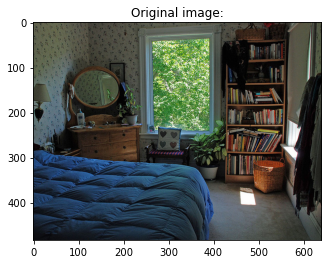

fg_conv2d_17 has shape: (1, 112, 112, 2, 2)


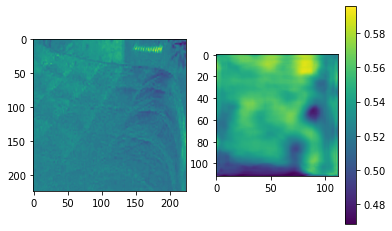

In [32]:
plt.title("Original image:")
plt.imshow(batch.images.full[0][:, :, [2, 1, 0]])
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(batch.instances.ab[0][:, :, 0, 0])

plt.subplot(1, 2, 2)
print(f"fg_conv2d_17 has shape: {fg_conv2d_17.shape}")
slice = fg_conv2d_17[0, :, :, 1, 0]
plt.imshow(slice)
plt.colorbar()
plt.show()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: fg_model_3_3:0
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: fg_conv2d_11_3:0
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: fg_conv2d_13_3:0
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: fg_conv2d_15_3:0
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: fg_conv2d_17_3:0
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: bbox_1:0
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: mask_1:0


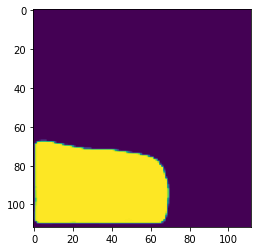

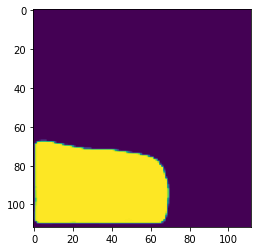

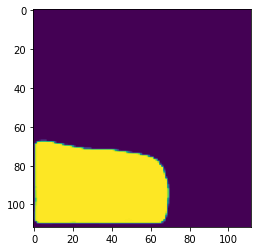

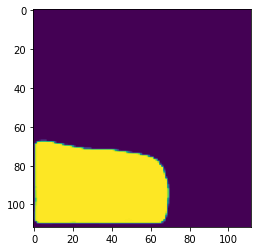

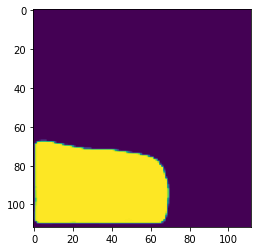

KeyboardInterrupt: 

In [55]:
fusion_generator = fusion_model.combined.get_layer(name='model_8')
feature_extractor = Model(
    inputs=fusion_generator.input,
    outputs=fusion_generator.get_layer(name='up_sampling2d_3').output
)

feature = feature_extractor([batch.resized_images.l.astype(np.float32), fg_model_3, fg_conv2d_11, fg_conv2d_13,
                             fg_conv2d_15, fg_conv2d_17, batch.instances.bbox.astype(np.float32), batch.instances.mask.astype(np.float32)])

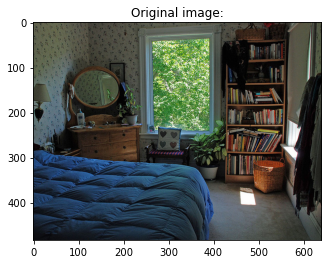

batch_normalization_6 has shape: (1, 28, 28, 256)


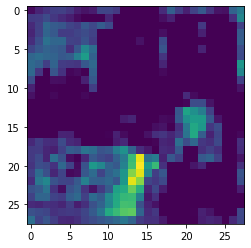

In [53]:
plt.title("Original image:")
plt.imshow(batch.images.full[0][:, :, [2, 1, 0]])
plt.show()

# plt.subplot(1, 2, 1)
# plt.imshow(batch.images.[0][:, :, 0])

# plt.subplot(1, 2, 2)
print(f"up_sampling2d_3 has shape: {feature.shape}")
slice = feature[0, :, :, 2]
plt.imshow(slice)
# plt.colorbar()
plt.show()